# TMP exploration

```python
import torch
all_scores = torch.load('tmp_scores.pt', map_location=torch.device('cpu'))

```python
len(all_scores[0])

```python
scores = all_scores[0]

```python
scores.shape

```python
import matplotlib.pyplot as plt
import numpy as np

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(scores[1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(scores.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
import torch
all_E = torch.load('tmp_E.pt', map_location=torch.device('cpu'))

```python
E, E_v = all_E[0]

```python
E.shape

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(E.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

---
---
---

# Visualize experiments results

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
#import seaborn as sns

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


You can chose to study a run among these:

!ls /scratch2/clear/ejehanno/models_weights/

By relaunching
```bash
python main.py --cfg /scratch2/clear/ejehanno/models_weights/zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads_DoubleScaling-Q+K+E_multi_V+E_multi_DptConn_noHeads_DoubleScaling_4seeds/\(Q+K+E_multi\)\*\(V+E_multi\)_DptConn_noHeads_DoubleScaling_4seeds/config.yaml train.auto_resume True
```
Or Whatever

In [3]:
def extractor(xp_name):
    # '(QK+E)*(V+E)_multi_DptHead' # cfg.wandb.name
    main_path = '/scratch2/clear/ejehanno/extracted/'
    extracted_path = os.path.join(main_path, xp_name)
    all_scores = torch.load(os.path.join(extracted_path, 'scores.pt'),
                            map_location=torch.device('cpu'))
    all_E = torch.load(os.path.join(extracted_path, 'Ea.pt'),
                            map_location=torch.device('cpu'))
    all_Ev = torch.load(os.path.join(extracted_path, 'Ev.pt'),
                            map_location=torch.device('cpu'))
    batch = torch.load(os.path.join(extracted_path, 'batch.pt'),
                            map_location=torch.device('cpu'))
    return all_scores, all_E, all_Ev, batch

In [4]:
all_scores, all_E, all_Ev, batch = extractor('(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds')

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


## Exploration of the techniques

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][0,:16,:16,0,idx].numpy())
    plt.colorbar()
    plt.axis('off')
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
import matplotlib.cm as cm
from matplotlib.colors import Normalize
fig, axes = plt.subplots(nrows=4, ncols=4)
cmap=cm.get_cmap('viridis')
normalizer=Normalize(all_scores[0][0,:16,:16,0,:].min(),all_scores[0][0,:16,:16,0,:].max())
im=cm.ScalarMappable(norm=normalizer)
for idx, ax in enumerate(axes.flat):
    im = ax.imshow(all_scores[0][0,:16,:16,0,idx].numpy(),cmap=cmap,norm=normalizer)
    #plt.colorbar()
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_E[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_Ev[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy()
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), 
                             repeats=loc_scores.shape[-1], axis=1)
    ax = main.add_subplot(4,1,idx+1)
    ax.imshow(loc_scores, alpha=transparency*.1)
    im = tmp.imshow(loc_scores, alpha=1.0)
    main.colorbar(im, ax=ax)
plt.close(tampon)
main.show()

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_E[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_Ev[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Now we dive into the details for interesting ones

In [7]:
all_scores, all_E, all_Ev, batch = extractor(
    '(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds'
)

```python
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

```python
plt.figure(figsize=(12,12))
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), repeats=loc_scores.shape[-1], axis=1)
    plt.subplot(4,1,idx+1)
    try:
        plt.imshow(loc_scores[1,idx,:23,:].numpy(), alpha=transparency*.1)
    except:
        print(idx)
    #plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Publishable version

In [8]:
from torch_geometric.utils import to_dense_batch

In [9]:
# h_dense, mask = to_dense_batch(batch.x, batch.batch)
# mask = mask.unsqueeze(-1) * mask.unsqueeze(1)
# print(all_scores[0][batch_idx].shape)
# all_scores[0][batch_idx][mask[batch_idx]].shape#.reshape(32,31,31,1,-1)\
batch_idx = 4
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)
loc_scores = all_scores[0][batch_idx][mask]
num_nodes = int(np.sqrt(loc_scores.shape[0]))
loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:])).shape

torch.Size([20, 20, 1, 64])

``` python
batch_idx = 6 # 6
head_idx = 0
#channel_slice = range(nb_channels)
channel_slice = range(26,30)
# channel_slice = range(44,48)
# channel_slice = range(53,57)
# channel_slice = range(57,61)
nb_channels = len(channel_slice)
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)
plt.figure(figsize=(12,12*int(nb_channels/4)))
for rk, layer_idx in enumerate([0,4,9]):
    for channel_idx in channel_slice:
        loc_scores = all_scores[layer_idx][batch_idx][mask]
        num_nodes = int(np.sqrt(loc_scores.shape[0]))
        loc_scores = loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:]))
        plt.subplot(nb_channels,3,channel_idx*3 + rk + 1)
        plt.imshow(loc_scores[:,:,head_idx,channel_idx].numpy())
        #plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        if rk==0:
            plt.ylabel(f'Channel {channel_idx + 1}', fontsize=14)
        if channel_idx==0:
            plt.title(f'Layer {layer_idx+1}', fontsize=14)
plt.subplots_adjust(wspace=-.5, hspace=.1)
plt.show()

```python
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
node_idx = 4
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_scores[layer_idx].reshape(32, 31, 31, -1)[1,node_idx,:23,:].numpy()
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==node_idx][1].numpy()
    transparency = np.ones(23) * 4 # 6
    transparency[neighbors] += 4 # 8
    transparency = np.repeat(transparency.reshape(-1,1), 
                             repeats=loc_scores.shape[-1], axis=1)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores, alpha=transparency*.1)
    im = tmp.imshow(loc_scores, alpha=1.0)
    main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

---
---
---
With only a few channels:

In [4]:
from torch_geometric.utils import to_dense_batch

In [10]:
all_scores, all_E, all_Ev, batch = extractor('(QK+E)*(V+E)_DptConn_VerySmall_vf')

In [11]:
batch_idx = 6 # 6
head_idx = 0
node_idx = 4
batch_node_idx = batch.ptr[batch_idx] + node_idx
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)

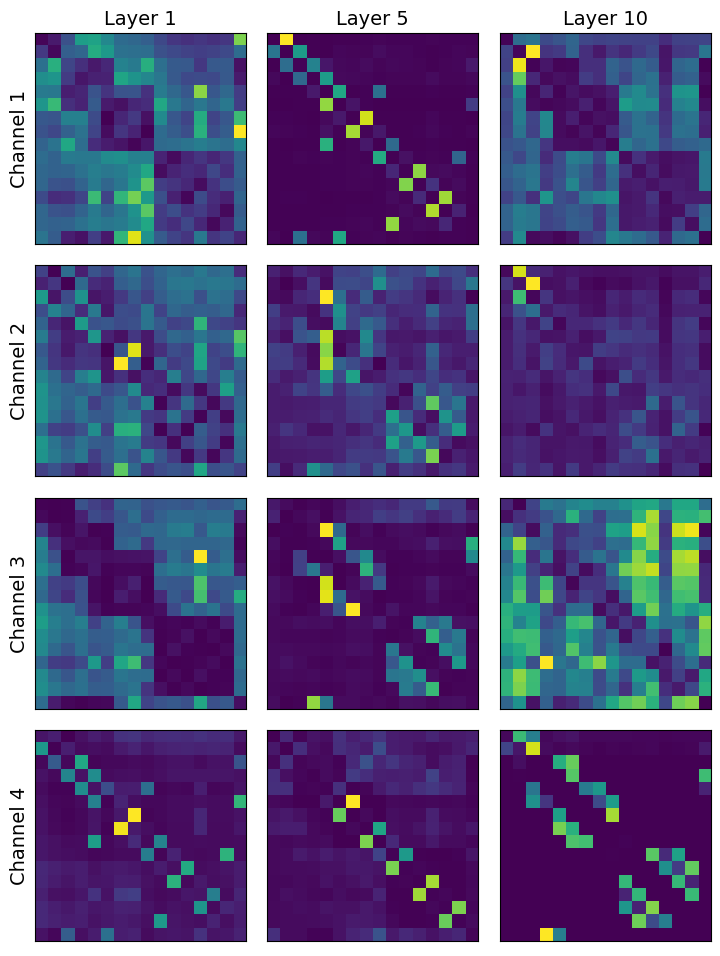

In [7]:
nb_channels = 16
channel_slice = range(4)
# channel_slice = range(26,30)
# channel_slice = range(44,48)
# channel_slice = range(53,57)
# channel_slice = range(57,61)
plt.figure(figsize=(12,12*int(nb_channels/4)))
for rk, layer_idx in enumerate([0,4,9]):
    for channel_idx in channel_slice:
        loc_scores = all_scores[layer_idx][batch_idx][mask]
        num_nodes = int(np.sqrt(loc_scores.shape[0]))
        loc_scores = loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:]))
        plt.subplot(nb_channels,3,channel_idx*3 + rk + 1)
        plt.imshow(loc_scores[:,:,head_idx,channel_idx].numpy())
        #plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        if rk==0:
            plt.ylabel(f'Channel {channel_idx + 1}', fontsize=14)
        if channel_idx==0:
            plt.title(f'Layer {layer_idx+1}', fontsize=14)
plt.subplots_adjust(wspace=-.5, hspace=.1)
plt.show()

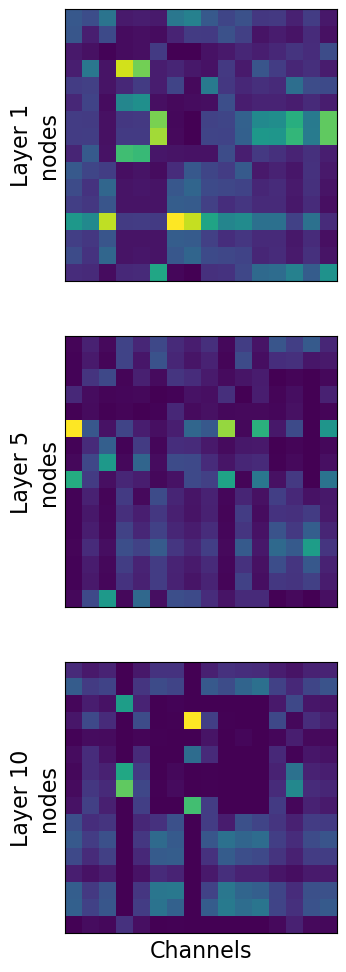

In [53]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_scores[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    # main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

In [55]:
neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy()

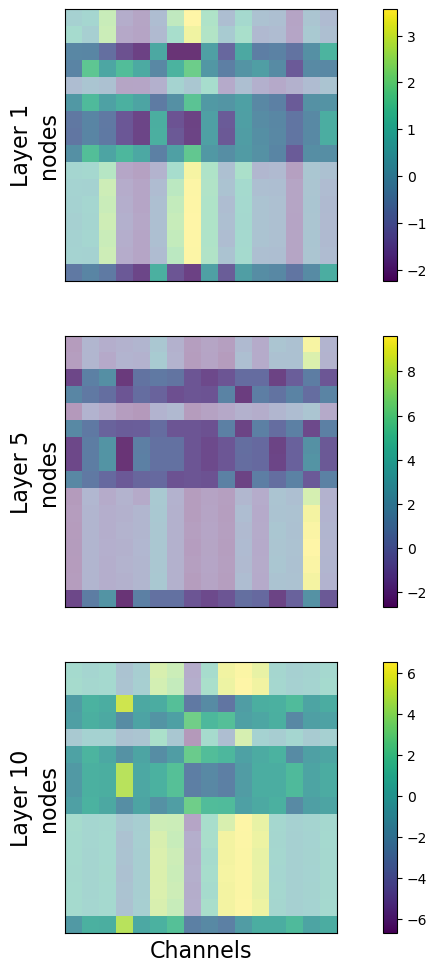

In [59]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_E[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy() - batch.ptr[batch_idx].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    #main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

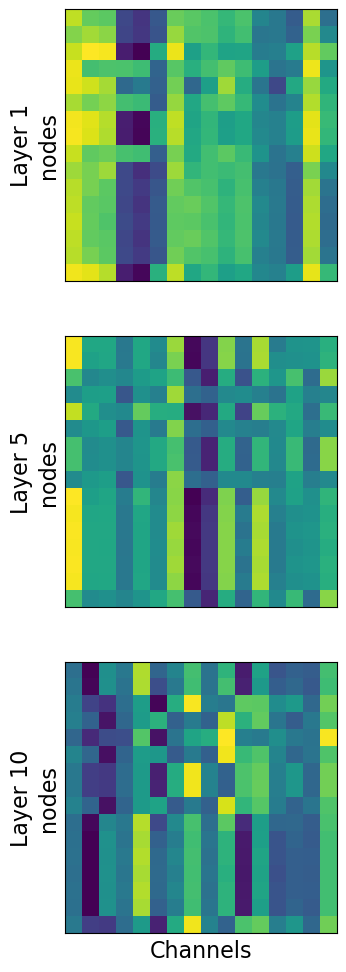

In [61]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_Ev[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy() - batch.ptr[batch_idx].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    #main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

In [12]:
from torch_geometric.utils import to_dense_adj
import networkx as nx
#edge_index, _ = add_self_loops(batch.edge_index)
adj_matrix = to_dense_adj(batch.edge_index, batch.batch)

In [169]:
true_adj = adj_matrix[batch_idx][mask]
num_nodes = int(np.sqrt(true_adj.shape[0]))
true_adj = true_adj.reshape(num_nodes,num_nodes)
del_edge = {
    3:[15,5],
    2:[5,4],
    15:[4],
    4:[7,8],
    5:[6,8],
    6:[7],
    9:[11,12,13],
    10:[12,13,14],
    11:[13,14],
    12:[14],
}
for k in del_edge.keys():
    for v in del_edge[k]:
        true_adj[k,v]=0
        true_adj[v,k]=0
# Extend graph with 2 nodes unrelated that will help standardize colors later
ext_adj = np.zeros((num_nodes+2,num_nodes+2))
ext_adj[:num_nodes,:num_nodes] = true_adj.numpy()
ext_adj[8,num_nodes]=1
ext_adj[9,num_nodes+1]=1
graph = nx.from_numpy_array(ext_adj)
# graph = nx.from_numpy_array(true_adj.numpy())

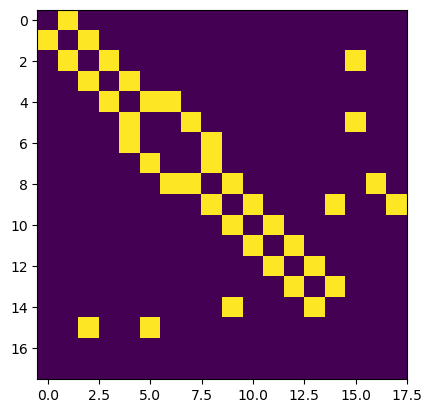

In [170]:
plt.imshow(ext_adj)

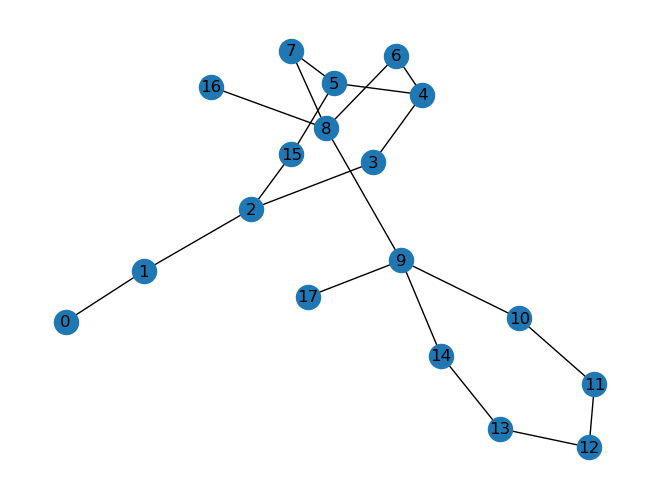

In [171]:
nx.draw(graph, with_labels=True)

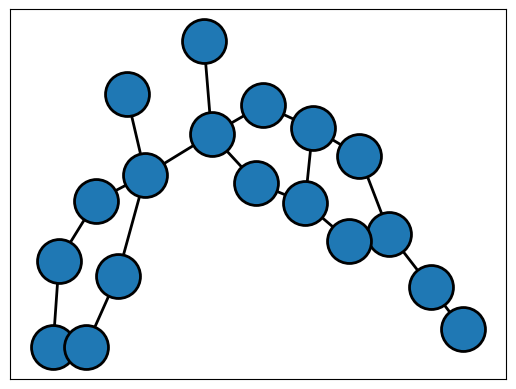

In [172]:
pos = nx.layout.spectral_layout(graph, center=(0,0))
pos = nx.spring_layout(graph, pos=pos, iterations=50)
# graph.add_nodes_from([16,17])
# graph.nodes[16]['pos'] = (0,0)
# graph.nodes[17]['pos'] = (0,0)
# graph.add_edge(16,0)
# graph.add_edge(16,17)
nx.draw_networkx_nodes(graph, pos, #node_color=colors, alpha=transparency,
                           linewidths=2, node_size=1000, edgecolors='black',
                           cmap='viridis')
# fig.colorbar(im,ax=ax)
nx.draw_networkx_edges(graph, pos, width=2)

In [76]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [92]:
colors

[0.023062553,
 0.010154328,
 0.010997519,
 0.29019085,
 0.034308232,
 0.14291553,
 0.05018873,
 0.052838672,
 0.21559334,
 0.012998117,
 0.016890489,
 0.016258424,
 0.054089986,
 0.016258424,
 0.016890489,
 0.03636436,
 0.0002543373,
 0.3109044]

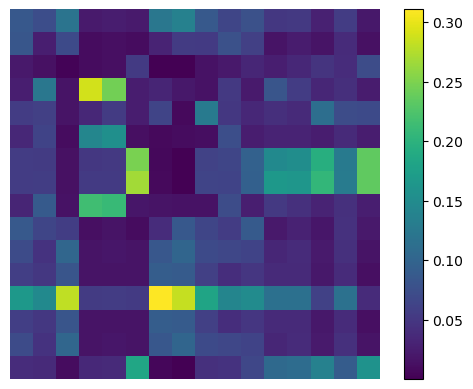

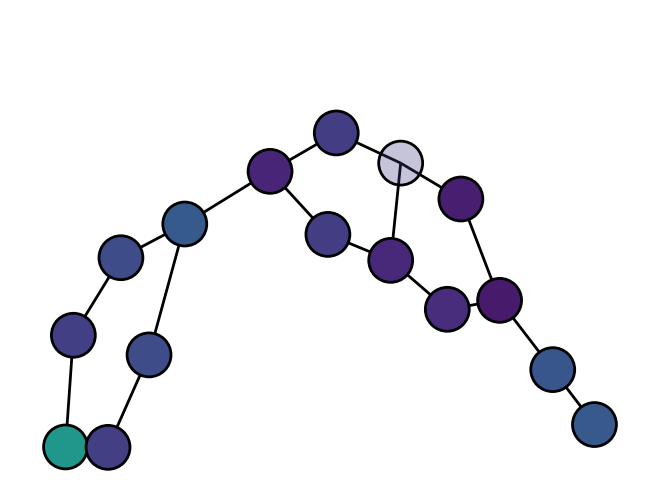

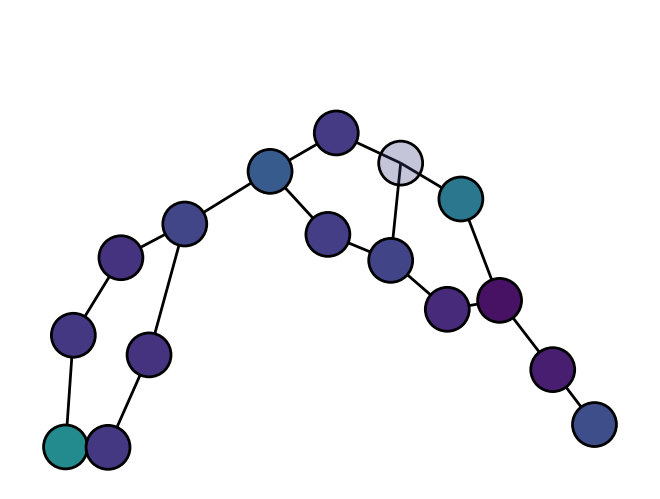

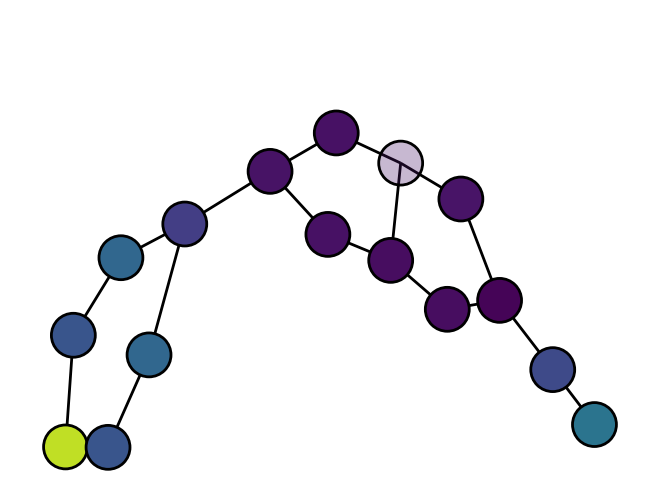

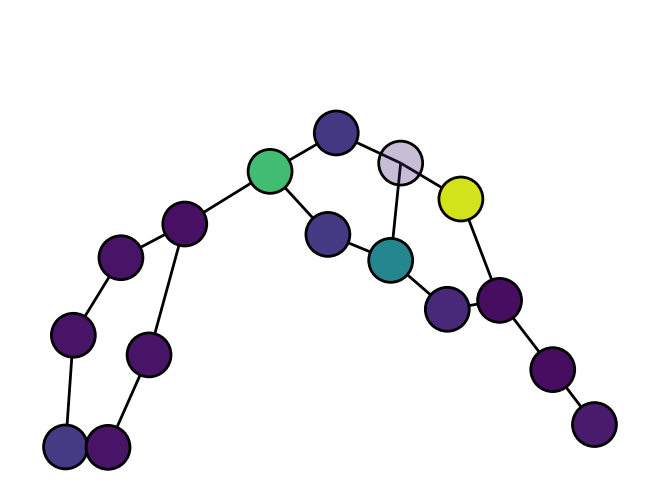

In [184]:
pos = nx.layout.spectral_layout(graph)
pos = nx.spring_layout(graph, pos=pos, iterations=50)

layer_idx = 0
loc_scores = all_scores[layer_idx][batch_idx][mask]
loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
plt.imshow(loc_scores)
plt.xlabel('Channels')
plt.ylabel('Neighbors')
plt.axis('off')
plt.colorbar()
# cmap=cm.get_cmap('viridis')
# norm=Normalize(loc_scores.min(),loc_scores.max())
# im = cm.ScalarMappable(norm=norm)
transparency = np.ones(num_nodes+2)
transparency[node_idx] = 0.3
transparency[num_nodes:] = 0.


for channel_idx in range(4):
    colors = list(loc_scores[:,channel_idx]) + [loc_scores.min(), loc_scores.max()]
    #~~~~~~~~~~~~
    # Draw graph
    #~~~~~~~~~~~~
    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    
    node_size = [1000]*num_nodes+[0,0]
    nx.draw_networkx_nodes(graph, pos, node_color=colors, alpha=transparency,
                           linewidths=2, edgecolors='black',
                           cmap='viridis', node_size=node_size) # node_size=1000
    # fig.colorbar(im,ax=ax)
    width=[0 if v+1>num_nodes else 2 for u,v in graph.edges()]
    nx.draw_networkx_edges(graph, pos, width=width)
    plt.show()

In [178]:
graph.edges()

EdgeView([(0, 1), (1, 2), (2, 3), (2, 15), (3, 4), (4, 5), (4, 6), (5, 7), (5, 15), (6, 8), (7, 8), (8, 9), (8, 16), (9, 10), (9, 14), (9, 17), (10, 11), (11, 12), (12, 13), (13, 14)])

In [21]:
batch.edge_index[:,batch.edge_index[0,:]==node]

tensor([[143, 143, 143, 143],
        [130, 131, 132, 133]])

In [24]:
true_nodes_idx = list(range(batch.ptr[batch_idx],batch.ptr[batch_idx]+num_nodes))
print(true_nodes_idx)
for node in true_nodes_idx[8:-1]:
    rings = batch.ring_index[:,batch.ring_index[0]==node].numpy()
    if rings.shape[1]!=0:
        print(rings)
        print(batch.edge_index[:,batch.edge_index[0,:]==node])

[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]
[[136 136 136 136]
 [134 133 132 135]]
tensor([[136, 136, 136, 136, 136],
        [132, 133, 134, 135, 137]])
[[137 137 137 137 137]
 [142 139 138 141 140]]
tensor([[137, 137, 137, 137, 137, 137],
        [136, 138, 139, 140, 141, 142]])
[[138 138 138 138 138]
 [137 140 139 142 141]]
tensor([[138, 138, 138, 138, 138],
        [137, 139, 140, 141, 142]])
[[139 139 139 139 139]
 [142 138 141 137 140]]
tensor([[139, 139, 139, 139, 139],
        [137, 138, 140, 141, 142]])
[[140 140 140 140 140]
 [138 141 137 139 142]]
tensor([[140, 140, 140, 140, 140],
        [137, 138, 139, 141, 142]])
[[141 141 141 141 141]
 [139 142 138 137 140]]
tensor([[141, 141, 141, 141, 141],
        [137, 138, 139, 140, 142]])
[[142 142 142 142 142]
 [138 141 137 140 139]]
tensor([[142, 142, 142, 142, 142],
        [137, 138, 139, 140, 141]])


In [49]:
batch

DataBatch(x=[732, 16], edge_index=[2, 2892], edge_attr=[2892, 16], y=[32], pestat_RWSE=[732, 20], ring_index=[2, 2270], batch=[732], ptr=[33], edge_dense=[32, 31, 31, 16], attn_mask=[32, 31, 31], graph_feature=[32, 1])